# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2023-02-17 21:47:14--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.4’

test.dat.4          100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-17 21:47:15 (234 MB/s) - ‘test.dat.4’ saved [2844/2844]

--2023-02-17 21:47:15--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.4’

train.dat.4         100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-17 21:47:15 (116 MB/s) - ‘train.dat.4’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dp = sum(a*b for a,b in zip(array1, array2))
    return dp


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    s_out = 1/(1 + math.exp(-x))
    return s_out

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    in_val = dot_product(weight,instance)
    output = sigmoid(in_val)
    return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    out_val = dot_product(weights,instance)
    if out_val >= 0.5:
      return 1
    else:
      return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Assign initial weights as '0' of length same as input vector instance
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Calculate output of the perceptron model and then error between expected output
            #from the instances last column(label) and actual output calculated using the model
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Update weights using stochastic gradient descent 
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.

### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The predict function would simply calculate the dot product of the weights and the input instance and then apply a step function to it to get the predicted class label. However, the sigmoid function used in the train_perceptron has the advantage of providing a smooth output that can be interpreted as the probability of the positive class. This is because the sigmoid function maps any real-valued input to a value between 0 and 1.

By using the sigmoid function, we can interpret the output as a probability that the input instance belongs to the positive class. This allows us to use the error between the true label and the predicted probability to adjust the weights, which is a key step in the training process of the perceptron.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

# looping through set of learning rates
for lr in lr_array:
  # looping through set of training percentages
  for tr_size in tr_percent:
    # looping through set of epochs
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    #printing the output at the end of each training loop
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



####3.A

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

# looping through set of learning rates
for lr in lr_array:
  # looping through set of training percentages
  tr_per_accuracy = []
  for tr_size in tr_percent:
    # looping through set of epochs
    epoch_accuracy = []
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      epoch_accuracy.append(accuracy)
    #saved each training percentage accuracy for plotting 
    tr_per_accuracy.append(accuracy)
    #printing the output at the end of each training loop
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100

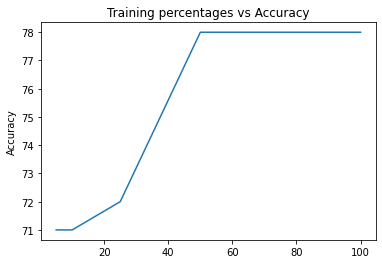

In [7]:
import matplotlib.pyplot as plt
plt.plot(tr_percent, tr_per_accuracy)
plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Training percentages vs Accuracy')
plt.show()

3.A) No, you do not need to train with all the training dataset to get the highest accuracy with the test dataset. In fact, training with all the training dataset may lead to overfitting, where the model learns the training dataset too well and performs poorly on unseen data. As we can see from above plot, maximum accuracy is obtained with 50% of the training data.

####3.B

3.B) The first run used **Higher learning rate** than the second run and so the accuracy is higher than the second run despite of the higher training data. 

A lower learning rate means that the model updates its parameters more slowly, which can result in slower convergence to the optimal solution. If the model has not fully converged in the second run, it may perform worse than the first run. Also a lower learning rate may cause the model to get stuck in a local optima, rather than finding the global optima.


####3.C

3.C) Yes, there are many hyperparameters other than epochs and learning rate that can impact the accuracy of a model. Preprocessing methods, Batch size, Dropout rate, Network architecture are some of the examples of other hyperparameters. Tuning these additional hyperparameters requires careful experimentation and analysis to identify the optimal values that result in the best performance

####3.D

In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.05, 0.01, 0.005]        # learning rate

# looping through set of learning rates
for lr in lr_array:
  # looping through set of training percentages
  tr_per_accuracy = []
  for tr_size in tr_percent:
    # looping through set of epochs
    epoch_accuracy = []
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      epoch_accuracy.append(accuracy)
    #saved each training percentage accuracy for plotting 
    tr_per_accuracy.append(accuracy)
    #printing the output at the end of each training loop
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 72.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100

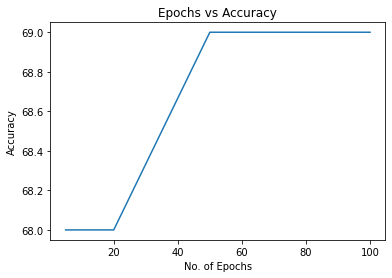

In [9]:
import matplotlib.pyplot as plt
plt.plot(num_epochs, epoch_accuracy)
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

3.D) As we can see from the above plot, the highest accuracy is obtained even at 50 epochs, so no need for 100 epochs.

It is not always worth training for more epochs, even if all other hyperparameters are kept fixed. The optimal number of epochs depends on several factors, such as the complexity of the model, the amount of training data, the presence of overfitting, and the specific task.